Data saved successfully!
  Transport Status  Transport Status Sentiment  News Sentiment  \
0          Delayed                        -1.0        0.027551   
1          Delayed                        -1.0        0.672653   
2        Delivered                         1.0        0.200830   
3        Delivered                         1.0       -0.461069   
4        Delivered                         1.0       -0.615187   

   News Sentiment Polarity  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  


In [3]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('supply_chain_sample_data.csv')

# Step 2: Display the first few rows to check the data
print(df.head())


                  Date         Region       Country    Supplier    Item  \
0  2020-01-01 00:00:00  North America           USA  Supplier B  Item Z   
1  2020-01-01 00:01:00  South America  South Africa  Supplier E  Item W   
2  2020-01-01 00:02:00  South America           USA  Supplier B  Item Y   
3  2020-01-01 00:03:00           Asia       Germany  Supplier D  Item Y   
4  2020-01-01 00:04:00           Asia       Germany  Supplier B  Item X   

   Inventory Level  Lead Time (days) Transport Status  News Sentiment  \
0             4401                 3          Delayed        0.027551   
1               88                19          Delayed        0.672653   
2             1780                 2        Delivered        0.200830   
3             3480                 9        Delivered       -0.461069   
4             3977                 6        Delivered       -0.615187   

   Risk Factor  
0     0.053238  
1     0.029133  
2     0.020455  
3     0.786145  
4     0.778914  


In [4]:
# Step 2: Sentiment analysis on 'Transport Status'
status_sentiment_map = {
    'Delivered': 1,  # Positive sentiment
    'In transit': 0,  # Neutral sentiment
    'On Time': 1,  # Positive sentiment
    'Pending': 0,  # Neutral sentiment
    'Delayed': -1  # Negative sentiment
}

# Map the sentiment values to a new column 'Transport Status Sentiment'
df['Transport Status Sentiment'] = df['Transport Status'].map(status_sentiment_map)

# Display the updated DataFrame to check the new column
print(df[['Transport Status', 'Transport Status Sentiment']].head())


  Transport Status  Transport Status Sentiment
0          Delayed                        -1.0
1          Delayed                        -1.0
2        Delivered                         1.0
3        Delivered                         1.0
4        Delivered                         1.0


In [6]:
# Sentiment mapping for 'Transport Status'
status_sentiment_map = {
    'Delivered': 1,  # Positive sentiment
    'In Transit': 0,  # Neutral sentiment
    'On Time': 1,  # Positive sentiment
    'Pending': 0,  # Neutral sentiment
    'Delayed': -1  # Negative sentiment
}

# Map the sentiment values to a new column 'Transport Status Sentiment'
df['Transport Status Sentiment'] = df['Transport Status'].map(status_sentiment_map)

# Display the updated DataFrame to check the new column
print(df[['Transport Status', 'Transport Status Sentiment']].head())



  Transport Status  Transport Status Sentiment
0          Delayed                          -1
1          Delayed                          -1
2        Delivered                           1
3        Delivered                           1
4        Delivered                           1


In [7]:
# Categorize the 'News Sentiment' column into Positive, Neutral, and Negative
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorization function to the 'News Sentiment' column
df['News Sentiment Category'] = df['News Sentiment'].apply(categorize_sentiment)

# Display the updated DataFrame to check the new column
print(df[['News Sentiment', 'News Sentiment Category']].head())


   News Sentiment News Sentiment Category
0        0.027551                Positive
1        0.672653                Positive
2        0.200830                Positive
3       -0.461069                Negative
4       -0.615187                Negative


In [8]:
# Group by 'Transport Status' and 'News Sentiment Category' to see the distribution
sentiment_transport_status = df.groupby(['Transport Status', 'News Sentiment Category']).size().unstack()

# Display the result
print(sentiment_transport_status)


News Sentiment Category  Negative  Positive
Transport Status                           
Delayed                     99618    100363
Delivered                  100031     99764
In Transit                  99954     99979
On Time                     99710    100435
Pending                     99839    100307


In [9]:
import seaborn as sns

# Plotting sentiment distribution across transport statuses
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Transport Status', hue='News Sentiment Category', palette='coolwarm')
plt.title('Sentiment Distribution by Transport Status')
plt.xlabel('Transport Status')
plt.ylabel('Count')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [10]:
# Step 1: Load the data
import pandas as pd

# Load the CSV file
df = pd.read_csv('supply_chain_sample_data.csv')

# Step 2: Sentiment Analysis - Create Sentiment Categories for News Sentiment
def categorize_sentiment(score):
    if score >= 0:
        return 'Positive'
    else:
        return 'Negative'

df['News Sentiment Category'] = df['News Sentiment'].apply(categorize_sentiment)

# Step 3: Sentiment Analysis - Create Sentiment for Transport Status
# Map transport status to sentiment values
sentiment_mapping = {
    'Delayed': -1,
    'Delivered': 1,
    'In Transit': 0,
    'On Time': 1,
    'Pending': 0
}

df['Transport Status Sentiment'] = df['Transport Status'].map(sentiment_mapping)

# Step 4: Save the updated DataFrame to a new CSV file
df.to_csv('updated_supply_chain_data.csv', index=False)

# Confirm that the file is saved
print("File saved successfully as 'updated_supply_chain_data.csv'")


File saved successfully as 'updated_supply_chain_data.csv'


In [11]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset
file_name = 'supply_chain_sample_data.csv'  # Use the file name directly if you're in the correct folder
df = pd.read_csv(file_name)

# Step 2: Perform Sentiment Analysis on 'Transport Status'
def get_sentiment(transport_status):
    # You can assign sentiment values based on transport status (if needed)
    sentiment_map = {
        'Delayed': -1,
        'Delivered': 1,
        'In Transit': 0,  # Neutral
        'On Time': 1,
        'Pending': 0  # Neutral
    }
    return sentiment_map.get(transport_status, 0)  # Default to neutral (0) if not found

# Apply sentiment analysis to the 'Transport Status' column
df['Transport Status Sentiment'] = df['Transport Status'].apply(get_sentiment)

# Step 3: Perform Sentiment Analysis on 'News Sentiment'
def get_news_sentiment(sentiment_score):
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'News Sentiment' column
df['News Sentiment Category'] = df['News Sentiment'].apply(get_news_sentiment)

# Step 4: Label Encoding for 'Transport Status'
encoder = LabelEncoder()
df['Transport Status Encoded'] = encoder.fit_transform(df['Transport Status'])

# Step 5: Save the updated dataset
updated_file_name = 'updated_supply_chain_sample_data.csv'  # Save with a new file name in the same folder
df.to_csv(updated_file_name, index=False)

# Display the updated data
print(df.head())

                  Date         Region       Country    Supplier    Item  \
0  2020-01-01 00:00:00  North America           USA  Supplier B  Item Z   
1  2020-01-01 00:01:00  South America  South Africa  Supplier E  Item W   
2  2020-01-01 00:02:00  South America           USA  Supplier B  Item Y   
3  2020-01-01 00:03:00           Asia       Germany  Supplier D  Item Y   
4  2020-01-01 00:04:00           Asia       Germany  Supplier B  Item X   

   Inventory Level  Lead Time (days) Transport Status  News Sentiment  \
0             4401                 3          Delayed        0.027551   
1               88                19          Delayed        0.672653   
2             1780                 2        Delivered        0.200830   
3             3480                 9        Delivered       -0.461069   
4             3977                 6        Delivered       -0.615187   

   Risk Factor  Transport Status Sentiment News Sentiment Category  \
0     0.053238                          

In [16]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob

# Step 1: Load the dataset
file_name = 'supply_chain_sample_data.csv'  # Use the file name directly if you're in the correct folder
df = pd.read_csv(file_name)

# Step 2: Perform Sentiment Analysis on 'Transport Status'
def get_sentiment(transport_status):
    # Assign sentiment values based on transport status
    sentiment_map = {
        'Delayed': -1,     # Negative sentiment
        'Delivered': 1,    # Positive sentiment
        'In Transit': 0,   # Neutral sentiment
        'On Time': 1,      # Positive sentiment
        'Pending': 0       # Neutral sentiment
    }
    return sentiment_map.get(transport_status, 0)  # Default to neutral (0) if not found

# Apply sentiment analysis to the 'Transport Status' column
df['Transport Status Sentiment'] = df['Transport Status'].apply(get_sentiment)

# Step 3: Perform Sentiment Analysis on 'News Sentiment'
def get_news_sentiment(sentiment_score):
    # Ensure that exactly 0 is treated as Neutral, positive as Positive, and negative as Negative
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    elif sentiment_score == 0:  # Explicitly check for 0 and treat as Neutral
        return 'Neutral'

# Apply sentiment analysis to the 'News Sentiment' column
df['News Sentiment Category'] = df['News Sentiment'].apply(get_news_sentiment)

# Step 4: Save the updated dataset without 'Transport Status Encoded'
updated_file_name = 'updated_supply_chain_sample_data.csv'  # Save with a new file name in the same folder
df.to_csv(updated_file_name, index=False)

# Display the updated data
print(df.head())


                  Date         Region       Country    Supplier    Item  \
0  2020-01-01 00:00:00  North America           USA  Supplier B  Item Z   
1  2020-01-01 00:01:00  South America  South Africa  Supplier E  Item W   
2  2020-01-01 00:02:00  South America           USA  Supplier B  Item Y   
3  2020-01-01 00:03:00           Asia       Germany  Supplier D  Item Y   
4  2020-01-01 00:04:00           Asia       Germany  Supplier B  Item X   

   Inventory Level  Lead Time (days) Transport Status  News Sentiment  \
0             4401                 3          Delayed        0.027551   
1               88                19          Delayed        0.672653   
2             1780                 2        Delivered        0.200830   
3             3480                 9        Delivered       -0.461069   
4             3977                 6        Delivered       -0.615187   

   Risk Factor  Transport Status Sentiment News Sentiment Category  
0     0.053238                          -

In [17]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob

# Step 1: Load the dataset
file_name = 'supply_chain_sample_data.csv'  # Use the file name directly if you're in the correct folder
df = pd.read_csv(file_name)

# Step 2: Perform Sentiment Analysis on 'Transport Status'
def get_transport_sentiment(transport_status):
    # Assign sentiment values based on transport status
    sentiment_map = {
        'Delayed': -1,     # Negative sentiment
        'Delivered': 1,    # Positive sentiment
        'In Transit': 0,   # Neutral sentiment
        'On Time': 1,      # Positive sentiment
        'Pending': 0       # Neutral sentiment
    }
    return sentiment_map.get(transport_status, 0)  # Default to neutral (0) if not found

# Apply sentiment analysis to the 'Transport Status' column
df['Transport Status Sentiment'] = df['Transport Status'].apply(get_transport_sentiment)

# Step 3: Perform Sentiment Analysis on 'News Sentiment'
def get_news_sentiment(sentiment_score):
    # Ensure that exactly 0 is treated as Neutral, positive as Positive, and negative as Negative
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'  # Explicitly check for 0 and treat as Neutral

# Apply sentiment analysis to the 'News Sentiment' column
df['News Sentiment Category'] = df['News Sentiment'].apply(get_news_sentiment)

# Step 4: Save the updated dataset
updated_file_name = 'updated_supply_chain_sample_data.csv'  # Save with a new file name in the same folder
df.to_csv(updated_file_name, index=False)

# Display the updated data
print(df.head())


                  Date         Region       Country    Supplier    Item  \
0  2020-01-01 00:00:00  North America           USA  Supplier B  Item Z   
1  2020-01-01 00:01:00  South America  South Africa  Supplier E  Item W   
2  2020-01-01 00:02:00  South America           USA  Supplier B  Item Y   
3  2020-01-01 00:03:00           Asia       Germany  Supplier D  Item Y   
4  2020-01-01 00:04:00           Asia       Germany  Supplier B  Item X   

   Inventory Level  Lead Time (days) Transport Status  News Sentiment  \
0             4401                 3          Delayed        0.027551   
1               88                19          Delayed        0.672653   
2             1780                 2        Delivered        0.200830   
3             3480                 9        Delivered       -0.461069   
4             3977                 6        Delivered       -0.615187   

   Risk Factor  Transport Status Sentiment News Sentiment Category  
0     0.053238                          -

In [18]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob

# Step 1: Load the dataset
file_name = 'supply_chain_sample_data.csv'  # Use the file name directly if you're in the correct folder
df = pd.read_csv(file_name)

# Step 2: Perform Sentiment Analysis on 'Transport Status'
def get_transport_sentiment(transport_status):
    # Assign sentiment values based on transport status
    sentiment_map = {
        'Delayed': -1,     # Negative sentiment
        'Delivered': 1,    # Positive sentiment
        'In Transit': 0,   # Neutral sentiment
        'On Time': 1,      # Positive sentiment
        'Pending': 0       # Neutral sentiment
    }
    return sentiment_map.get(transport_status, 0)  # Default to neutral (0) if not found

# Apply sentiment analysis to the 'Transport Status' column
df['Transport Status Sentiment'] = df['Transport Status'].apply(get_transport_sentiment)

# Step 3: Perform Sentiment Analysis on 'News Sentiment'
def get_news_sentiment(sentiment_score):
    # Ensure that exactly 0 is treated as Neutral, positive as Positive, and negative as Negative
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'  # Explicitly check for 0 and treat as Neutral

# Apply sentiment analysis to the 'News Sentiment' column
df['News Sentiment Category'] = df['News Sentiment'].apply(get_news_sentiment)

# Step 4: Save the updated dataset
updated_file_name = 'updated_supply_chain_sample_data.csv'  # Save with a new file name in the same folder
df.to_csv(updated_file_name, index=False)

# Display the updated data
print(df.head())


                  Date         Region       Country    Supplier    Item  \
0  2020-01-01 00:00:00  North America           USA  Supplier B  Item Z   
1  2020-01-01 00:01:00  South America  South Africa  Supplier E  Item W   
2  2020-01-01 00:02:00  South America           USA  Supplier B  Item Y   
3  2020-01-01 00:03:00           Asia       Germany  Supplier D  Item Y   
4  2020-01-01 00:04:00           Asia       Germany  Supplier B  Item X   

   Inventory Level  Lead Time (days) Transport Status  News Sentiment  \
0             4401                 3          Delayed        0.027551   
1               88                19          Delayed        0.672653   
2             1780                 2        Delivered        0.200830   
3             3480                 9        Delivered       -0.461069   
4             3977                 6        Delivered       -0.615187   

   Risk Factor  Transport Status Sentiment News Sentiment Category  
0     0.053238                          -

In [19]:
# Import necessary libraries
import pandas as pd

# Step 1: Load the dataset
file_name = 'supply_chain_sample_data.csv'  # Use the file name directly if you're in the correct folder
df = pd.read_csv(file_name)

# Step 2: Perform Sentiment Analysis on 'Transport Status'
def get_transport_sentiment(transport_status):
    # Assign sentiment values based on transport status
    sentiment_map = {
        'Delayed': -1,     # Negative sentiment
        'Delivered': 1,    # Positive sentiment
        'In Transit': 0,   # Neutral sentiment
        'On Time': 1,      # Positive sentiment
        'Pending': 0       # Neutral sentiment
    }
    return sentiment_map.get(transport_status, 0)  # Default to neutral (0) if not found

# Apply sentiment analysis to the 'Transport Status' column
df['Transport Status Sentiment'] = df['Transport Status'].apply(get_transport_sentiment)

# Step 3: Save the updated dataset with only 'Transport Status Sentiment'
updated_file_name = 'updated_supply_chain_sample_data_step1.csv'  # Save with a new file name
df.to_csv(updated_file_name, index=False)

# Display the updated data
print(df[['Transport Status', 'Transport Status Sentiment']].head())


  Transport Status  Transport Status Sentiment
0          Delayed                          -1
1          Delayed                          -1
2        Delivered                           1
3        Delivered                           1
4        Delivered                           1


In [25]:
# Summary statistics
print(df.describe())

# Correlation analysis
correlation = df.corr()
print(correlation)


       Inventory Level  Lead Time (days)  News Sentiment   Risk Factor  \
count   1000000.000000    1000000.000000  1000000.000000  1.000000e+06   
mean       2499.151282         15.481496        0.001067  5.002598e-01   
std        1443.037447          8.658631        0.577354  2.887529e-01   
min           0.000000          1.000000       -0.999996  9.759363e-07   
25%        1250.000000          8.000000       -0.499104  2.502271e-01   
50%        2497.000000         15.000000        0.001669  5.003248e-01   
75%        3750.000000         23.000000        0.501117  7.506510e-01   
max        5000.000000         30.000000        0.999996  9.999982e-01   

       Transport Status Sentiment  
count              1000000.000000  
mean                     0.199959  
std                      0.748290  
min                     -1.000000  
25%                      0.000000  
50%                      0.000000  
75%                      1.000000  
max                      1.000000  


ValueError: could not convert string to float: '2020-01-01 00:00:00'

In [26]:
# Select only numeric columns for correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix for numeric columns
correlation = df[numeric_columns].corr()

# Display the correlation matrix
print(correlation)


                            Inventory Level  Lead Time (days)  News Sentiment  \
Inventory Level                    1.000000          0.000231       -0.000756   
Lead Time (days)                   0.000231          1.000000       -0.000689   
News Sentiment                    -0.000756         -0.000689        1.000000   
Risk Factor                        0.000642         -0.001382        0.000344   
Transport Status Sentiment        -0.000483          0.000587       -0.001028   

                            Risk Factor  Transport Status Sentiment  
Inventory Level                0.000642                   -0.000483  
Lead Time (days)              -0.001382                    0.000587  
News Sentiment                 0.000344                   -0.001028  
Risk Factor                    1.000000                   -0.001326  
Transport Status Sentiment    -0.001326                    1.000000  


In [28]:
pip install seaborn matplotlib


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.8 MB 2.4 MB/s eta 0:00:03
   -------- ------------------------------- 1.6/7.8 MB 2.5 MB/s eta 0:00:03
   ---------- ----------------------------- 2.1/7.8 MB 2.3 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/7.8 MB 2.5 MB/s eta 0:00:02
   ------------------ --------------------- 3.7/7.8 MB 2.8 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/7.8 MB 2.9 MB/s eta 0:00:02
   ---------------------------- ----------- 5.5/7.8 MB 3.2 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 3.4 MB/s eta 0:00:01
   --

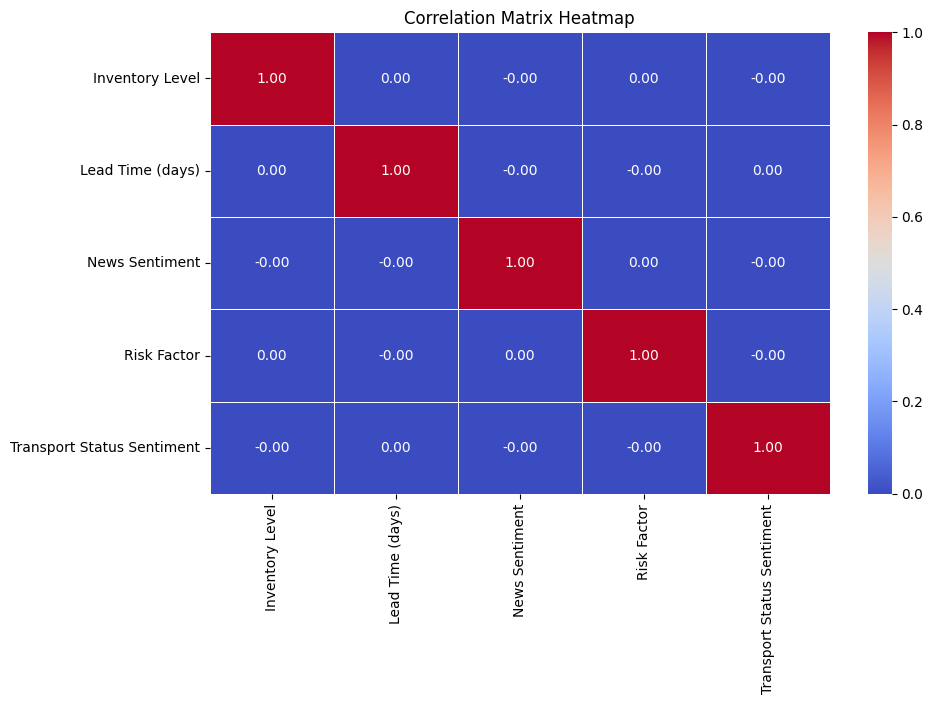

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [31]:
pip install openai



SyntaxError: invalid syntax (3498471039.py, line 1)

In [32]:
pip install openai

  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached pydantic-2.10.3-py3-none-any.whl.metadata (172 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
Using cached distro-1.9.0-py3-none-any.whl (20 kB)
Using cached pydantic-2.10.3-py3-none-any.whl (456 kB)
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   --------------- ------------------------ 0.8/2.0 MB 2.1 MB/s eta 0:00:01
   -------------------------- ------------- 1.3/2.0 MB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 2.6 MB/s eta 0:00:00
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install --upgrade openai

In [38]:
pip install openai==0.28


  Attempting uninstall: openai
    Found existing installation: openai 1.57.4
    Uninstalling openai-1.57.4:
      Successfully uninstalled openai-1.57.4
Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install --upgrade openai


  Using cached openai-1.57.4-py3-none-any.whl.metadata (24 kB)
Using cached openai-1.57.4-py3-none-any.whl (390 kB)
  Attempting uninstall: openai
    Found existing installation: openai 0.28.0
    Uninstalling openai-0.28.0:
      Successfully uninstalled openai-0.28.0
Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install openai==0.28


  Using cached openai-0.28.0-py3-none-any.whl.metadata (13 kB)
Using cached openai-0.28.0-py3-none-any.whl (76 kB)
  Attempting uninstall: openai
    Found existing installation: openai 1.57.4
    Uninstalling openai-1.57.4:
      Successfully uninstalled openai-1.57.4
Note: you may need to restart the kernel to use updated packages.


In [45]:
pip show openai


Name: openai
Version: 0.28.0
Summary: Python client library for the OpenAI API
Home-page: https://github.com/openai/openai-python
Author: OpenAI
Author-email: support@openai.com
License: 
Location: c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages
Requires: aiohttp, requests, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install --upgrade openai


  Using cached openai-1.57.4-py3-none-any.whl.metadata (24 kB)
Using cached openai-1.57.4-py3-none-any.whl (390 kB)
  Attempting uninstall: openai
    Found existing installation: openai 0.28.0
    Uninstalling openai-0.28.0:
      Successfully uninstalled openai-0.28.0
Note: you may need to restart the kernel to use updated packages.


In [47]:
pip show openai


Name: openai
Version: 1.57.4
Summary: The official Python library for the openai API
Home-page: https://github.com/openai/openai-python
Author: 
Author-email: OpenAI <support@openai.com>
License: Apache-2.0
Location: c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages
Requires: anyio, distro, httpx, jiter, pydantic, sniffio, tqdm, typing-extensions
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install transformers torch
